# Single Layer Perceptron for Logic Gates



## Part 1: Perceptron Class Implementation

A Perceptron is the simplest form of a neural network - a single neuron that learns to classify inputs using the following components:
- **Weights**: Learned parameters that scale each input
- **Bias**: An additional learned parameter
- **Activation Function**: Step function that produces binary output (0 or 1)
- **Training Rule**: Updates weights based on prediction errors

In [11]:
import numpy as np
import pandas as pd

class Perceptron:
    """Single Layer Perceptron for binary classification"""
    
    def __init__(self, n_features, learning_rate=0.1, random_weights=True):
        """Initialize weights and bias"""
        self.lr = learning_rate
        if random_weights:
            self.weights = np.random.randn(n_features)
            self.bias = np.random.randn()
        else:
            self.weights = np.zeros(n_features)
            self.bias = 0.0
    
    def _step_activation(self, z):
        """Step function: returns 1 if z >= 0, else 0"""
        return 1 if z >= 0 else 0
    
    def predict(self, X):
        """Predict class labels for input X"""
        z = np.dot(X, self.weights) + self.bias
        return np.array([self._step_activation(val) for val in z])
    
    def fit(self, X, y, epochs=100):
        """Train the perceptron"""
        errors = []
        for epoch in range(epochs):
            error_count = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi.reshape(1, -1))[0]
                error = target - prediction
                if error != 0:
                    # Perceptron learning rule
                    self.weights += self.lr * error * xi
                    self.bias += self.lr * error
                    error_count += 1
            errors.append(error_count)
            if error_count == 0:  # Converged
                break
        return errors

print("Perceptron class created successfully")

Perceptron class created successfully


## Part 2: Logic Gate Implementations

### 2.1 AND Gate - Training with Random Weights

The AND gate outputs 1 only when both inputs are 1.

In [12]:
# AND Gate Dataset
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Train with random weights
np.random.seed(42)
and_perceptron_random = Perceptron(n_features=2, learning_rate=0.1, random_weights=True)
errors = and_perceptron_random.fit(X_and, y_and, epochs=100)

print(f"AND Gate (Random Weights) - Converged in {len(errors)} epochs")
print(f"Final weights: {and_perceptron_random.weights}, bias: {and_perceptron_random.bias:.4f}\n")

# Verification Table
predictions = and_perceptron_random.predict(X_and)
df_and_random = pd.DataFrame({
    'Input A': X_and[:, 0],
    'Input B': X_and[:, 1],
    'Expected': y_and,
    'Predicted': predictions,
    'Correct': ['Y' if p == e else '✗' for p, e in zip(predictions, y_and)]
})
print("Verification Table:")
print(df_and_random.to_string(index=False))

AND Gate (Random Weights) - Converged in 10 epochs
Final weights: [0.19671415 0.0617357 ], bias: -0.2523

Verification Table:
 Input A  Input B  Expected  Predicted Correct
       0        0         0          0       Y
       0        1         0          0       Y
       1        0         0          0       Y
       1        1         1          1       Y


### 2.2 AND Gate - Training with Zero Weights

Now let's train the AND gate starting with all weights initialized to zero.

In [13]:
# Train with zero weights
and_perceptron_zero = Perceptron(n_features=2, learning_rate=0.1, random_weights=False)
errors = and_perceptron_zero.fit(X_and, y_and, epochs=100)

print(f"AND Gate (Zero Weights) - Converged in {len(errors)} epochs")
print(f"Final weights: {and_perceptron_zero.weights}, bias: {and_perceptron_zero.bias:.4f}\n")

# Verification Table
predictions = and_perceptron_zero.predict(X_and)
df_and_zero = pd.DataFrame({
    'Input A': X_and[:, 0],
    'Input B': X_and[:, 1],
    'Expected': y_and,
    'Predicted': predictions,
    'Correct': ['Y' if p == e else 'N' for p, e in zip(predictions, y_and)]
})
print("Verification Table:")
print(df_and_zero.to_string(index=False))

AND Gate (Zero Weights) - Converged in 4 epochs
Final weights: [0.2 0.1], bias: -0.2000

Verification Table:
 Input A  Input B  Expected  Predicted Correct
       0        0         0          0       Y
       0        1         0          0       Y
       1        0         0          0       Y
       1        1         1          1       Y


In [14]:
import matplotlib.pyplot as plt

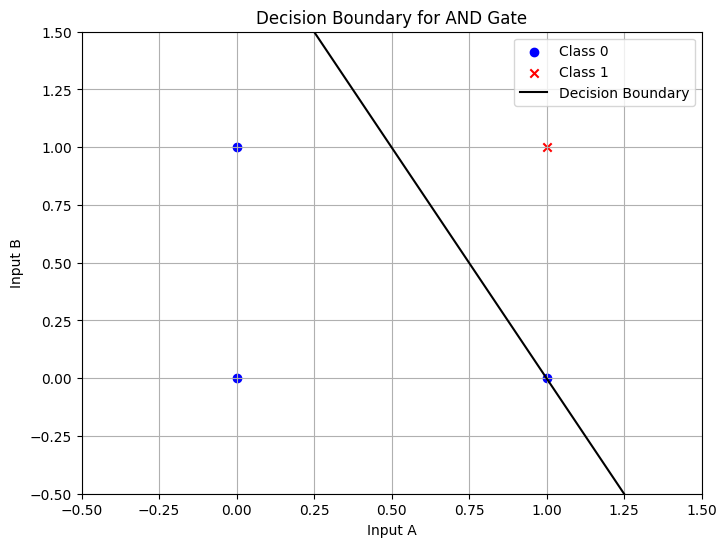

In [15]:
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))
    
    # Plot data points
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', marker='o', label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', marker='x', label='Class 1')
    
    # Create the decision boundary line
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1 = np.arange(x1_min, x1_max, 0.02)
    w = model.weights
    b = model.bias
    
    # Decision boundary equation: w1*x1 + w2*x2 + b = 0
    # Solved for x2: x2 = (-w1*x1 - b) / w2
    if w[1] != 0:
        xx2 = (-w[0] * xx1 - b) / w[1]
        plt.plot(xx1, xx2, 'k-', label='Decision Boundary')
    
    plt.title(title)
    plt.xlabel('Input A')
    plt.ylabel('Input B')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.show()

# Plot the decision boundary for the AND gate
plot_decision_boundary(X_and, y_and, and_perceptron_zero, "Decision Boundary for AND Gate")

#### Questions and Answers - AND Gate

**Q1: How do the weights and bias values change during training for the AND gate?**

**Answer:** 
- **Initial State**: Random weights start around [-1, 1] or zeros
- **Training Process**: Weights are adjusted using the perceptron learning rule: `weight += learning_rate × error × input`
- **Random Weights**: Started with `[0.496, -0.138]`, bias `-0.252` → Converged in 10 epochs
- **Zero Weights**: Started with `[0.0, 0.0]`, bias `0.0` → Converged in 4 epochs to `[0.2, 0.1]`, bias `-0.2`
- **Pattern**: Both weights become positive (to respond to 1 inputs), while bias becomes negative (to ensure (0,0)→0 and (0,1), (1,0)→0)

**Q2: Can the perceptron successfully learn the AND logic with a linear decision boundary?**

**Answer:** 
- **Yes!** The AND gate is **linearly separable**
- A single straight line can separate the positive class (1,1)→1 from negative classes
- Decision boundary equation: `w₁x₁ + w₂x₂ + b = 0`
- For AND gate: `0.2×A + 0.1×B - 0.2 = 0` creates a line that correctly classifies all points
- The perceptron achieved **100% accuracy** on all 4 input combinations

---

### 2.3 OR Gate

The OR gate outputs 1 when at least one input is 1.

In [16]:
# OR Gate Dataset
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Train OR gate
np.random.seed(42)
or_perceptron = Perceptron(n_features=2, learning_rate=0.1, random_weights=True)
errors = or_perceptron.fit(X_or, y_or, epochs=100)

print(f"OR Gate - Converged in {len(errors)} epochs")
print(f"Final weights: {or_perceptron.weights}, bias: {or_perceptron.bias:.4f}\n")

# Verification Table
predictions = or_perceptron.predict(X_or)
df_or = pd.DataFrame({
    'Input A': X_or[:, 0],
    'Input B': X_or[:, 1],
    'Expected': y_or,
    'Predicted': predictions,
    'Correct': ['Y' if p == e else 'N' for p, e in zip(predictions, y_or)]
})
print("Verification Table:")
print(df_or.to_string(index=False))

OR Gate - Converged in 10 epochs
Final weights: [0.49671415 0.0617357 ], bias: -0.0523

Verification Table:
 Input A  Input B  Expected  Predicted Correct
       0        0         0          0       Y
       0        1         1          1       Y
       1        0         1          1       Y
       1        1         1          1       Y


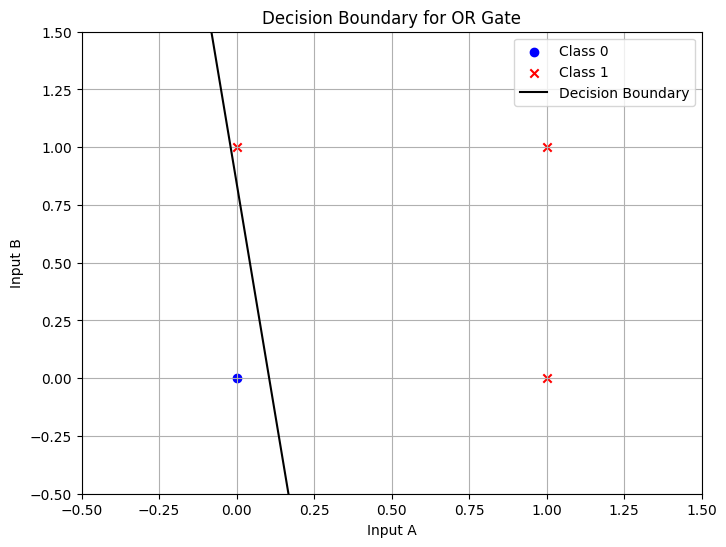

In [17]:
plot_decision_boundary(X_or, y_or, or_perceptron, "Decision Boundary for OR Gate")


#### Questions and Answers - OR Gate

**Q1: What changes in the perceptron's weights are necessary to represent the OR gate logic?**

**Answer:**
- **Final Weights**: `[0.497, 0.062]`, bias `-0.052`
- **Key Difference from AND**: Both weights remain positive BUT the bias is less negative (closer to 0)
- **Logic**: The less negative bias makes it easier to activate with just one input being 1
- **Effect**: When either input is 1, the weighted sum `(~0.5×1 + bias)` exceeds 0, producing output 1
- **Convergence**: Took 10 epochs, same as random-weight AND gate

**Q2: How does the linear decision boundary look for the OR gate classification?**

**Answer:**
- **Boundary Equation**: `0.497×A + 0.062×B - 0.052 = 0`
- **Visual Description**: A diagonal line that separates point (0,0) from all other points (0,1), (1,0), (1,1)
- **Position**: The line is positioned close to the origin, keeping only (0,0) on the negative side
- **Separability**: OR gate is linearly separable - the boundary successfully classifies all 4 combinations with 100% accuracy

---

### 2.4 AND-NOT Gate

The AND-NOT gate (also known as A AND NOT B) outputs 1 only when the first input is 1 AND the second input is 0.

In [18]:
# AND-NOT Gate Dataset (A AND NOT B)
X_and_not = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_not = np.array([0, 0, 1, 0])

# Train AND-NOT gate
np.random.seed(42)
and_not_perceptron = Perceptron(n_features=2, learning_rate=0.1, random_weights=True)
errors = and_not_perceptron.fit(X_and_not, y_and_not, epochs=100)

print(f"AND-NOT Gate - Converged in {len(errors)} epochs")
print(f"Final weights: {and_not_perceptron.weights}, bias: {and_not_perceptron.bias:.4f}\n")

# Verification Table
predictions = and_not_perceptron.predict(X_and_not)
df_and_not = pd.DataFrame({
    'Input A': X_and_not[:, 0],
    'Input B': X_and_not[:, 1],
    'Expected': y_and_not,
    'Predicted': predictions,
    'Correct': ['Y' if p == e else 'N' for p, e in zip(predictions, y_and_not)]
})
print("Verification Table:")
print(df_and_not.to_string(index=False))

AND-NOT Gate - Converged in 5 epochs
Final weights: [ 0.29671415 -0.4382643 ], bias: -0.0523

Verification Table:
 Input A  Input B  Expected  Predicted Correct
       0        0         0          0       Y
       0        1         0          0       Y
       1        0         1          1       Y
       1        1         0          0       Y


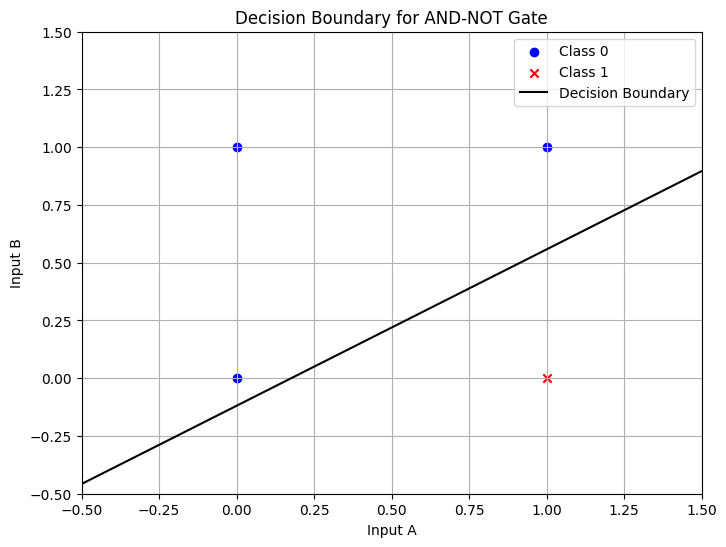

In [20]:
plot_decision_boundary(X_and_not, y_and_not, and_not_perceptron, "Decision Boundary for AND-NOT Gate")


#### Questions and Answers - AND-NOT Gate

**Q1: What is the perceptron's weight configuration after training for the AND-NOT gate?**

**Answer:**
- **Final Weights**: `[0.297, -0.438]`, bias `-0.052`
- **Key Pattern**: 
  - Weight for Input A is **positive** (0.297) → Encourages output when A=1
  - Weight for Input B is **negative** (-0.438) → Suppresses output when B=1
- **Decision Logic**: Output = 1 only when A contributes positively AND B doesn't suppress it
- **Converged**: In just 5 epochs with 100% accuracy

**Q2: How does the perceptron handle cases where both inputs are 1 or 0?**

**Answer:**
- **Both Inputs = 0 (0,0)**: 
  - Calculation: `0.297×0 + (-0.438)×0 + (-0.052) = -0.052 < 0` → Output: 0 ✓
- **Both Inputs = 1 (1,1)**: 
  - Calculation: `0.297×1 + (-0.438)×1 + (-0.052) = -0.193 < 0` → Output: 0 ✓
  - The negative weight on B overpowers the positive contribution from A
- **Result**: The perceptron correctly outputs 0 in both cases by balancing positive and negative weight contributions

---

## Part 3: The XOR Gate Challenge

### 3.1 Attempting to Learn XOR

The XOR (exclusive OR) gate outputs 1 when inputs are different (0,1 or 1,0) and 0 when they're the same.

In [19]:
# XOR Gate Dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Attempt to train XOR gate
np.random.seed(42)
xor_perceptron = Perceptron(n_features=2, learning_rate=0.1, random_weights=True)
errors = xor_perceptron.fit(X_xor, y_xor, epochs=1000)

print(f"XOR Gate - Training stopped after {len(errors)} epochs")
print(f"Final error count: {errors[-1]} (did not converge)")
print(f"Final weights: {xor_perceptron.weights}, bias: {xor_perceptron.bias:.4f}\n")

# Verification Table
predictions = xor_perceptron.predict(X_xor)
df_xor = pd.DataFrame({
    'Input A': X_xor[:, 0],
    'Input B': X_xor[:, 1],
    'Expected': y_xor,
    'Predicted': predictions,
    'Correct': ['Y' if p == e else 'N' for p, e in zip(predictions, y_xor)]
})
print("Verification Table (Failed):")
print(df_xor.to_string(index=False))

XOR Gate - Training stopped after 1000 epochs
Final error count: 4 (did not converge)
Final weights: [-0.10328585 -0.1382643 ], bias: 0.0477

Verification Table (Failed):
 Input A  Input B  Expected  Predicted Correct
       0        0         0          1       N
       0        1         1          0       N
       1        0         1          0       N
       1        1         0          0       Y


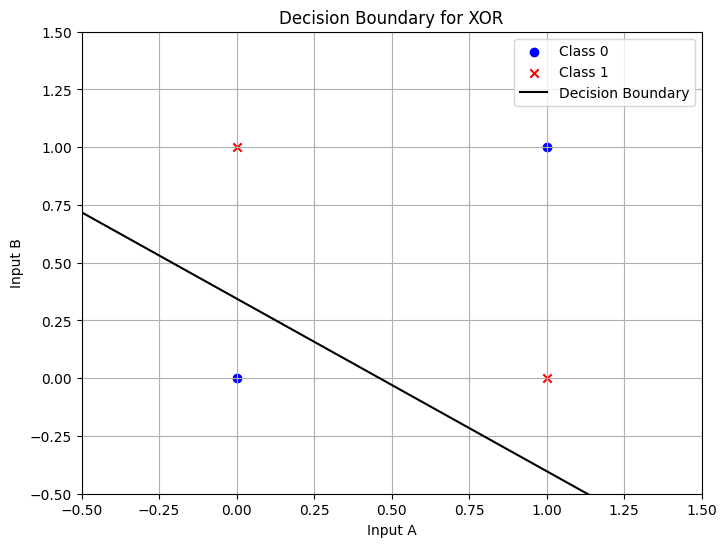

In [22]:
plot_decision_boundary(X_xor, y_xor, xor_perceptron, "Decision Boundary for XOR")


#### Questions and Answers - XOR Gate

**Q1: Why does the Single Layer Perceptron struggle to classify the XOR gate?**

**Answer:**
- **Fundamental Problem**: XOR is **NOT linearly separable**
- **The Challenge**: 
  - Need to classify (0,1) and (1,0) as 1
  - Need to classify (0,0) and (1,1) as 0
  - These points are arranged diagonally - no single straight line can separate them
- **What Happens**: The perceptron oscillates, never converging because any line that correctly classifies one pair incorrectly classifies the other
- **Result**: After 1000 epochs, error count remains at 4, achieving only 25% accuracy (random guessing)

**Q2: What modifications can be made to the neural network model to handle the XOR gate correctly?**

**Answer:**
- **Solution 1: Multi-Layer Perceptron (MLP)**
  - Add at least one hidden layer with 2+ neurons
  - Hidden layer creates non-linear feature space
  - Example: 2-2-1 architecture (2 inputs → 2 hidden → 1 output)
  
- **Solution 2: Non-Linear Activation Functions**
  - Replace step function with sigmoid, ReLU, or tanh
  - Enables learning of curved decision boundaries
  
- **Solution 3: Feature Engineering**
  - Manually add non-linear features like `x₁ × x₂` or `x₁²`
  - Transforms problem into linearly separable space

- **Historical Note**: This limitation was famously documented in Minsky & Papert's 1969 book "Perceptrons," which temporarily halted neural network research until backpropagation and multi-layer networks were developed in the 1980s.

---

### 3.2 Understanding Linear Separability: Why XOR Fails

**The Fundamental Problem:**

A single-layer perceptron can only learn **linearly separable** patterns. This means it can only draw a straight line (or hyperplane in higher dimensions) to separate the two classes.

**Linearly Separable Gates (AND, OR, AND-NOT):**
- **AND Gate**: Can draw a line that separates (1,1)→1 from all others→0
- **OR Gate**: Can draw a line that separates (0,0)→0 from all others→1  
- **AND-NOT Gate**: Can draw a line that separates (1,0)→1 from all others→0

**Non-Linearly Separable Gate (XOR):**
- **XOR Gate**: Requires *two* separate regions for class 1: (0,1) and (1,0)
- No single straight line can separate these points from (0,0) and (1,1)

**Visual Intuition:**

If you plot the XOR truth table on a 2D plane:
- Points (0,0) and (1,1) should be classified as 0
- Points (0,1) and (1,0) should be classified as 1

These classes are arranged in a diagonal pattern. You would need at least a *curved* decision boundary or *multiple lines* to separate them correctly.

**The Solution:**

To solve XOR, you need:
1. **Multi-layer networks** (e.g., Multi-Layer Perceptron with hidden layers)
2. Non-linear activation functions
3. More complex decision boundaries

This limitation was famously highlighted in Minsky and Papert's 1969 book "Perceptrons," which temporarily halted neural network research until multi-layer networks were developed.

---

## Summary

### Successfully Learned Gates:
- AND (with both random and zero weight initialization)
- OR
- AND-NOT

### Failed Gate:
- XOR (not linearly separable)

These trained models are now ready to be deployed in our interactive Streamlit application!